In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from collections import defaultdict

In [2]:
data = pd.read_csv('data/data.csv').drop('Unnamed: 0', axis = 1)

In [3]:
data['revenue'] = np.where(data['purchase'] == False, 0, 15)
data.replace({True: 1, False: 0}, inplace = True)
data.head()

,uid,timestamp,channel,clickthrough,purchase,gender,age,revenue
0,2697588,2021-01-01 08:00:00,facebook,0,0,Female,Gen Alpha,0
1,2697588,2021-01-02 08:00:00,email,0,0,Female,Gen Alpha,0
2,2697588,2021-01-02 09:20:00,search,0,0,Female,Gen Alpha,0
3,2697588,2021-01-02 10:40:00,search,0,1,Female,Gen Alpha,15
4,2697588,2021-01-02 12:00:00,facebook,0,0,Female,Gen Alpha,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822361 entries, 0 to 6822360
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   uid           int64 
 1   timestamp     object
 2   channel       object
 3   clickthrough  int64 
 4   purchase      int64 
 5   gender        object
 6   age           object
 7   revenue       int64 
dtypes: int64(4), object(4)
memory usage: 416.4+ MB


In [ ]:
heat = sns.heatmap(data[['channel', 'clickthrough','purchase']]).corr()
heat

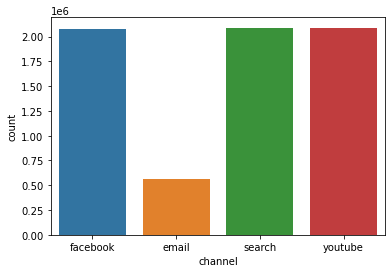

In [9]:
sns.countplot(x = 'channel', data = data)
plt.show()

Text(0, 0.5, 'Purchases')

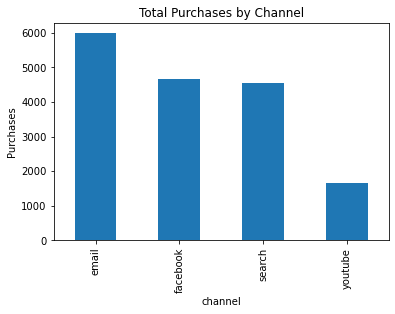

In [12]:
channels = data.groupby('channel')['purchase'].sum()
channels.plot.bar()
plt.title('Total Purchases by Channel')
plt.ylabel('Purchases')

Text(0.5, 1.0, 'Total Visits Per Channel')

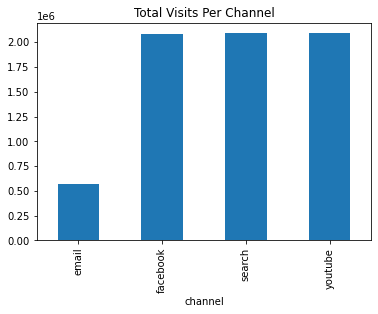

In [14]:
visits = data.groupby('channel')['timestamp'].count()
visits.plot.bar()
plt.title('Total Visits Per Channel')

<AxesSubplot:ylabel='gender,channel'>

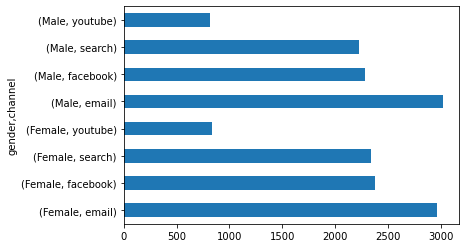

In [13]:
gender = data.groupby(['gender', 'channel'])['purchase'].sum()
gender.plot(kind = 'barh')

In [22]:
data.groupby(['gender', 'age', 'channel'])['revenue'].sum()

gender  age        channel 
Female  Boomer     email        4170
                   facebook     3780
                   search       3600
                   youtube      1365
        Gen Alpha  email       32385
                   facebook    25500
                   search      24510
                   youtube      8625
        Gen Z      email        3870
                   facebook     2970
                   search       3585
                   youtube      1215
        Millenial  email        4080
                   facebook     3420
                   search       3330
                   youtube      1275
Male    Boomer     email        4305
                   facebook     3075
                   search       3510
                   youtube      1155
        Gen Alpha  email       31725
                   facebook    24255
                   search      22740
                   youtube      8520
        Gen Z      email        4425
                   facebook     3015
          

In [29]:
conversions = data.groupby('channel')['purchase'].sum()
conversions

channel
email       5982
facebook    4662
search      4561
youtube     1650
Name: purchase, dtype: int64

<AxesSubplot:xlabel='gender,channel'>

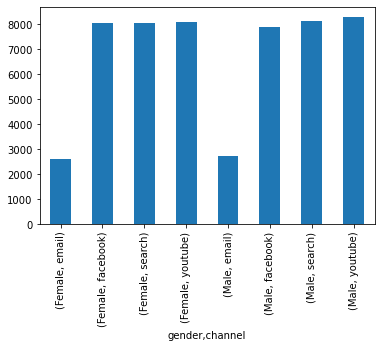

In [32]:
clickthrough = data.groupby(['gender', 'channel'])['clickthrough'].sum()

clickthrough.plot.bar()

In [26]:
data[(data['uid'] == 2697588) & (data['purchase'] == 1)]

,uid,timestamp,channel,clickthrough,purchase,gender,age,revenue
3,2697588,2021-01-02 10:40:00,search,0,1,Female,Gen Alpha,15
366,2697588,2021-03-21 17:50:46,search,0,1,Female,Gen Alpha,15


In [39]:
pur = data[data['purchase']==1].groupby('channel')['timestamp'].mean()

pur

DataError: No numeric types to aggregate

Text(0.5, 1.0, 'Channel Clickthrough by Gender')

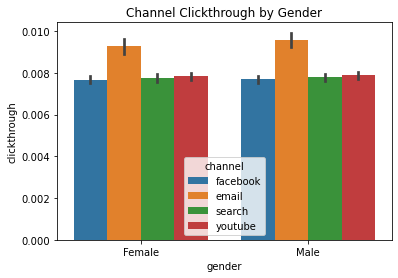

In [15]:
ax = sns.barplot(x = data['gender'], y = data['clickthrough'], hue = data['channel'])
ax.set_title('Channel Clickthrough by Gender')

Text(0.5, 1.0, 'Channel Purchase by Gender')

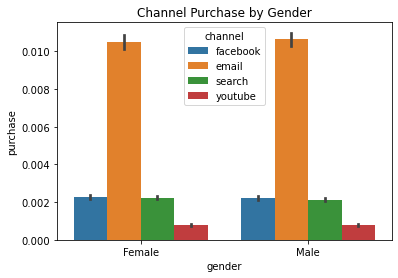

In [16]:
ax = sns.barplot(x = data['gender'], y = data['purchase'], hue = data['channel'])
ax.set_title('Channel Purchase by Gender')

In [87]:
test = data[data['uid'] == 1000276]
test

,uid,timestamp,channel,clickthrough,purchase,gender,age,revenue
5384911,1000276,2021-01-01 08:00:00,facebook,0,0,Male,Gen Alpha,0
5384912,1000276,2021-01-01 08:32:00,facebook,0,0,Male,Gen Alpha,0
5384913,1000276,2021-01-01 09:04:00,facebook,0,0,Male,Gen Alpha,0
5384914,1000276,2021-01-01 09:36:00,facebook,0,0,Male,Gen Alpha,0
5384915,1000276,2021-01-01 10:08:00,search,0,0,Male,Gen Alpha,0
...,...,...,...,...,...,...,...,...
5385892,1000276,2021-04-10 20:00:00,facebook,0,0,Male,Gen Alpha,0
5385893,1000276,2021-04-10 20:40:00,facebook,0,0,Male,Gen Alpha,0
5385894,1000276,2021-04-10 21:20:00,facebook,0,0,Male,Gen Alpha,0
5385895,1000276,2021-04-10 22:00:00,email,0,0,Male,Gen Alpha,0


In [82]:
#trying to note down the marketing path until a conversion
def marketing_path(uid, data): 
    user = data[data['uid'] == uid] 
    path = []
    for channel, buy in zip(user['channel'], user['purchase']):
        if buy == 0:
            path.append(channel)
        elif buy == 1:
            path.append(channel)
            break
    return path
            
marketing_path(2697588, test)

['facebook', 'email', 'search', 'search']

In [135]:
#am easier way to follow the marketing path of a customer
path = data.groupby('uid')['channel'].aggregate(lambda x: x.unique().tolist()).reset_index()


In [5]:
#removing duplicated UID's and keeping purchase data
last = data.drop_duplicates('uid', keep = 'last')[['uid','purchase']]
last

,uid,purchase
481,2697588,0
1006,9569845,0
1343,4983829,0
2223,4183239,0
3073,4984417,0
...,...,...
6819758,5466211,0
6819982,9024244,0
6820860,9018528,0
6821661,2277899,0


In [136]:
path = pd.merge(path, last, how = "left", on = 'uid')
path

,uid,channel,purchase
0,1000276,"[facebook, search, youtube, email]",0
1,1001694,"[email, youtube, search, facebook]",0
2,1002585,"[facebook, email, youtube, search]",0
3,1003246,"[email, youtube, search, facebook]",0
4,1003254,"[facebook, search, youtube, email]",0
...,...,...,...
9988,9993220,"[youtube, search, email, facebook]",0
9989,9993273,"[facebook, youtube, search, email]",0
9990,9996991,"[facebook, search, youtube, email]",0
9991,9997701,"[search, email, facebook, youtube]",0


In [138]:
path[path['purchase'] == 1].count()

uid         37
channel     37
purchase    37
dtype: int64

In [116]:
path['path'] = np.where(path['purchase'] == 0,
                        ['Start'] + path['channel'] + ['Null'],
                        ['Start'] + path['channel'] + ['Conversion'])

path = path[['uid','path']]

path

TypeError: Cannot broadcast np.ndarray with operand of type <class 'list'>

In [143]:
con = []
for row in path['purchase']:
    if row == 1:
        con.append(['conversion'])
    else:
        con.append(['end'])
        
con.count(['conversion'])

37

In [145]:
path['conversion'] = con
path['channel'] = path['channel'] + path['conversion']
path

,uid,channel,purchase,conversion
0,1000276,"[facebook, search, youtube, email, end]",0,[end]
1,1001694,"[email, youtube, search, facebook, end]",0,[end]
2,1002585,"[facebook, email, youtube, search, end]",0,[end]
3,1003246,"[email, youtube, search, facebook, end]",0,[end]
4,1003254,"[facebook, search, youtube, email, end]",0,[end]
...,...,...,...,...
9988,9993220,"[youtube, search, email, facebook, end]",0,[end]
9989,9993273,"[facebook, youtube, search, email, end]",0,[end]
9990,9996991,"[facebook, search, youtube, email, end]",0,[end]
9991,9997701,"[search, email, facebook, youtube, end]",0,[end]


In [146]:
path['test'] = path['channel'].map(lambda x: x.insert(0,'start'))

path

,uid,channel,purchase,conversion,test
0,1000276,"[start, facebook, search, youtube, email, end]",0,[end],None
1,1001694,"[start, email, youtube, search, facebook, end]",0,[end],None
2,1002585,"[start, facebook, email, youtube, search, end]",0,[end],None
3,1003246,"[start, email, youtube, search, facebook, end]",0,[end],None
4,1003254,"[start, facebook, search, youtube, email, end]",0,[end],None
...,...,...,...,...,...
9988,9993220,"[start, youtube, search, email, facebook, end]",0,[end],None
9989,9993273,"[start, facebook, youtube, search, email, end]",0,[end],None
9990,9996991,"[start, facebook, search, youtube, email, end]",0,[end],None
9991,9997701,"[start, search, email, facebook, youtube, end]",0,[end],None


In [149]:
path = path[['uid','channel']]
#1105013
path

,uid,channel
0,1000276,"[start, facebook, search, youtube, email, end]"
1,1001694,"[start, email, youtube, search, facebook, end]"
2,1002585,"[start, facebook, email, youtube, search, end]"
3,1003246,"[start, email, youtube, search, facebook, end]"
4,1003254,"[start, facebook, search, youtube, email, end]"
...,...,...
9988,9993220,"[start, youtube, search, email, facebook, end]"
9989,9993273,"[start, facebook, youtube, search, email, end]"
9990,9996991,"[start, facebook, search, youtube, email, end]"
9991,9997701,"[start, search, email, facebook, youtube, end]"


In [152]:
num_of_paths = path['channel']

total_conversion = sum(path.count('conversion') for path in path['channel'].tolist())
base_rate = total_conversion/len(num_of_paths)
base_rate

0.003702591814269989

In [154]:
#counting how many times a user went from one channel/state to another

def transition_states(list_of_paths):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    transition_states = {x + '>' + y: 0 for x in list_of_unique_channels for y in list_of_unique_channels}

    for possible_state in list_of_unique_channels:
        if possible_state not in ['conversion', 'end']:
            for user_path in list_of_paths:
                if possible_state in user_path:
                    indices = [i for i, s in enumerate(user_path) if possible_state in s]
                    for col in indices:
                        transition_states[user_path[col] + '>' + user_path[col + 1]] += 1

    return transition_states


trans_states = transition_states(num_of_paths)
trans_states

{'conversion>conversion': 0,
 'conversion>end': 0,
 'conversion>youtube': 0,
 'conversion>email': 0,
 'conversion>start': 0,
 'conversion>facebook': 0,
 'conversion>search': 0,
 'end>conversion': 0,
 'end>end': 0,
 'end>youtube': 0,
 'end>email': 0,
 'end>start': 0,
 'end>facebook': 0,
 'end>search': 0,
 'youtube>conversion': 10,
 'youtube>end': 2460,
 'youtube>youtube': 0,
 'youtube>email': 2571,
 'youtube>start': 0,
 'youtube>facebook': 2469,
 'youtube>search': 2446,
 'email>conversion': 8,
 'email>end': 2521,
 'email>youtube': 2454,
 'email>email': 0,
 'email>start': 0,
 'email>facebook': 2543,
 'email>search': 2423,
 'start>conversion': 0,
 'start>end': 0,
 'start>youtube': 2524,
 'start>email': 2428,
 'start>start': 0,
 'start>facebook': 2478,
 'start>search': 2563,
 'facebook>conversion': 11,
 'facebook>end': 2493,
 'facebook>youtube': 2477,
 'facebook>email': 2438,
 'facebook>start': 0,
 'facebook>facebook': 0,
 'facebook>search': 2516,
 'search>conversion': 8,
 'search>end': 24

In [160]:

def transition_prob(trans_dict):
    list_of_unique_channels = set(x for element in num_of_paths for x in element)
    trans_prob = defaultdict(dict)
    for state in list_of_unique_channels:
        if state not in ['conversion', 'end']:
            counter = 0
            index = [i for i, s in enumerate(trans_dict) if state + '>' in s]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    counter += trans_dict[list(trans_dict)[col]]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    state_prob = float((trans_dict[list(trans_dict)[col]])) / float(counter)
                    trans_prob[list(trans_dict)[col]] = state_prob

    return trans_prob


trans_prob = transition_prob(trans_states)
trans_prob

defaultdict(dict,
            {'youtube>conversion': 0.001004419445560466,
             'youtube>end': 0.24708718360787466,
             'youtube>email': 0.2582362394535958,
             'youtube>facebook': 0.24799116110887906,
             'youtube>search': 0.24568099638409,
             'email>conversion': 0.0008041009146647904,
             'email>end': 0.2533923007337421,
             'email>youtube': 0.24665795557342446,
             'email>facebook': 0.25560357824907026,
             'email>search': 0.2435420645290984,
             'start>youtube': 0.25257680376263386,
             'start>email': 0.24297007905533874,
             'start>facebook': 0.24797358150705495,
             'start>search': 0.2564795356749725,
             'facebook>conversion': 0.0011071967790639156,
             'facebook>end': 0.2509310518369401,
             'facebook>youtube': 0.24932058379466532,
             'facebook>email': 0.24539506794162053,
             'facebook>search': 0.2532460996477101,
  

In [161]:
def transition_matrix(num_of_paths, transition_probabilities):
    trans_matrix = pd.DataFrame()
    list_of_unique_channels = set(x for element in num_of_paths for x in element)

    for channel in list_of_unique_channels:
        trans_matrix[channel] = 0.00
        trans_matrix.loc[channel] = 0.00
        trans_matrix.loc[channel][channel] = 1.0 if channel in ['conversion', 'end'] else 0.0

    for key, value in transition_probabilities.items():
        origin, destination = key.split('>')
        trans_matrix.at[origin, destination] = value

    return trans_matrix


trans_matrix = transition_matrix(num_of_paths, trans_prob)
trans_matrix

,conversion,end,youtube,email,start,facebook,search
conversion,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
end,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
youtube,0.001004,0.247087,0.000000,0.258236,0.0,0.247991,0.245681
email,0.000804,0.253392,0.246658,0.000000,0.0,0.255604,0.243542
start,0.000000,0.000000,0.252577,0.242970,0.0,0.247974,0.256480
facebook,0.001107,0.250931,0.249321,0.245395,0.0,0.000000,0.253246
search,0.000804,0.249497,0.251407,0.252513,0.0,0.245778,0.000000


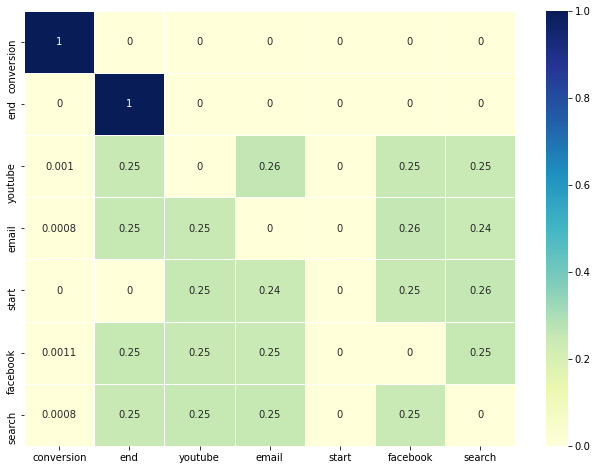

In [172]:
fig, ax = plt.subplots(figsize = (11,8))
ax = sns.heatmap(trans_matrix, annot = True, cmap="YlGnBu", linewidths= 1, linecolor = 'white')

In [174]:
def removal_effects(df, conversion_rate):
    removal_effects_dict = {}
    channels = [channel for channel in df.columns if channel not in ['start',
                                                                     'end',
                                                                     'conversion']]
    for channel in channels:
        removal_df = df.drop(channel, axis=1).drop(channel, axis=0)
        for column in removal_df.columns:
            row_sum = np.sum(list(removal_df.loc[column]))
            null_pct = float(1) - row_sum
            if null_pct != 0:
                removal_df.loc[column]['end'] = null_pct
            removal_df.loc['end']['end'] = 1.0

        removal_to_conv = removal_df[
            ['end', 'conversion']].drop(['end', 'conversion'], axis=0)
        removal_to_non_conv = removal_df.drop(
            ['end', 'conversion'], axis=1).drop(['end', 'conversion'], axis=0)

        removal_inv_diff = np.linalg.inv(
            np.identity(
                len(removal_to_non_conv.columns)) - np.asarray(removal_to_non_conv))
        removal_dot_prod = np.dot(removal_inv_diff, np.asarray(removal_to_conv))
        removal_cvr = pd.DataFrame(removal_dot_prod,
                                   index=removal_to_conv.index)[[1]].loc['start'].values[0]
        removal_effect = 1 - removal_cvr / conversion_rate
        removal_effects_dict[channel] = removal_effect

    return removal_effects_dict


removal_effects_dict = removal_effects(trans_matrix, base_rate)
removal_effects_dict

{'youtube': 0.635507344253466,
 'email': 0.6046550613893136,
 'facebook': 0.64662344802324,
 'search': 0.6086409445645411}

In [177]:
def markov_chain_allocations(removal_effects, total_conversions):
    re_sum = np.sum(list(removal_effects.values()))

    return {k: (v / re_sum) * total_conversions for k, v in removal_effects.items()}


attributions = markov_chain_allocations(removal_effects_dict, total_conversion)
attributions

{'youtube': 9.422745541584796,
 'email': 8.965294949652758,
 'facebook': 9.587565379126527,
 'search': 9.024394129635915}

<BarContainer object of 4 artists>

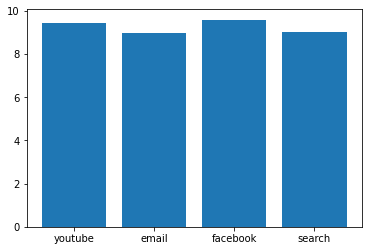

In [183]:
plt.bar(x = attributions.keys(), height=attributions.values())